# Sarthak_gupta
# code on text news classification 

In [1]:
from sklearn.datasets import fetch_20newsgroups
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC

In [2]:
data=fetch_20newsgroups()
categories=data.target_names

In [3]:
train =fetch_20newsgroups(subset='train')

In [4]:

print(train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
train_target_names=[]
for i in train.target:
    train_target_names.append(train.target_names[i])

In [11]:
train_target_names

['rec.autos',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'sci.space',
 'talk.politics.guns',
 'sci.med',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware',
 'rec.motorcycles',
 'talk.religion.misc',
 'comp.sys.mac.hardware',
 'sci.space',
 'misc.forsale',
 'alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'comp.windows.x',
 'alt.atheism',
 'rec.sport.hockey',
 'misc.forsale',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'sci.electronics',
 'rec.sport.baseball',
 'soc.religion.christian',
 'rec.autos',
 'misc.forsale',
 'sci.med',
 'sci.electronics',
 'talk.politics.mideast',
 'talk.politics.misc',
 'rec.sport.hockey',
 'rec.motorcycles',
 'sci.crypt',
 'rec.motorcycles',
 'talk.politics.guns',
 'rec.sport.baseball',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'rec.sport.baseball',
 'rec.sport.baseball',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'rec.motorcycl

In [7]:
np.unique(trai)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [6]:
train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [12]:
df=pd.DataFrame(train.data,columns=['news'])
df['target'] = train_target_names
df

,news,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,comp.graphics


In [8]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
train.target

array([7, 4, 4, ..., 3, 1, 8])

In [10]:
np.bincount(train.target)

array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
       594, 593, 599, 546, 564, 465, 377], dtype=int64)

In [11]:
Xtrain=train.data
Ytrain=train.target
Ytrain

array([7, 4, 4, ..., 3, 1, 8])

In [12]:
len(Xtrain)

11314

In [13]:
test=fetch_20newsgroups(subset='test')

In [14]:
Xtest=test.data
Ytest=test.target

In [15]:
len(Xtest)

7532

# frequency


In [16]:
categories,frequency_train=np.unique(train.target,return_counts=True)


In [17]:
categories,frequency_train

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [18]:
categories=np.array(train.target_names)
categories

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype='<U24')

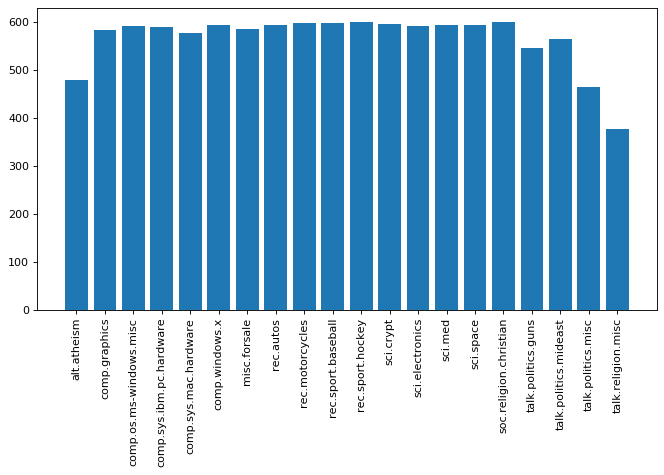

In [19]:
fig=plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(categories,frequency_train)
plt.xticks(rotation=90)
plt.show() 

In [20]:
categories,frequency_test=np.unique(test.target,return_counts=True)
categories,frequency_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
        396, 394, 398, 364, 376, 310, 251], dtype=int64))

In [21]:
categories=np.array(train.target_names)
categories

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype='<U24')

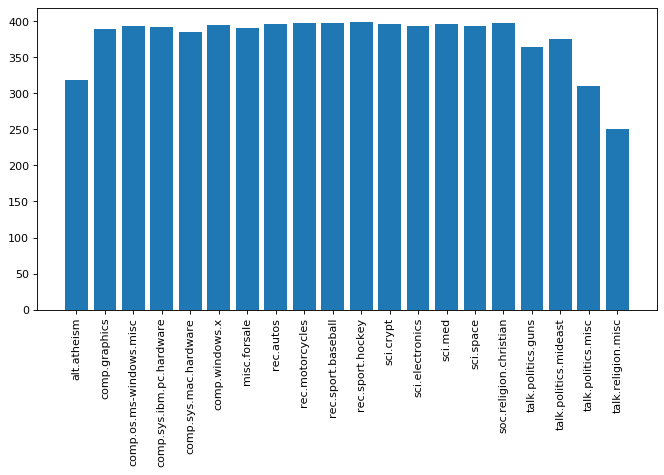

In [22]:
fig=plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(categories,frequency_test)
plt.xticks(rotation=90)
plt.show() 

# CLEANING

In [23]:
train.data[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [24]:
train.target_names[1]

'comp.graphics'

In [25]:
def clean(x):
    x = re.sub("wouldn\'t",'would not',x)
    x = re.sub("they\ 've",'they have',x)
    
    #to remove html tags
    x = re.sub(r'<.*?>', '', x)
    
    #to remove everything except alpha
    x = re.sub(r'[^a-zA-Z]',' ',x)
    #to remove \n
   # x = re.sub(r'\n',' ',x)
    
      
    x = re.sub(r'\s+',' ',x)          #remove extra space's
    return x.lower()

In [26]:
clean('I wouldn\'t hello  ..!  a 123#hi john <html> ok</html\n\n>\n\n')

'i would not hello a hi john ok html '

In [27]:
clean(train.data[1])

'from guykuo carson u washington edu guy kuo subject si clock poll final call summary final call for si clock reports keywords si acceleration clock upgrade article i d shelley qvfo innc s organization university of washington lines nntp posting host carson u washington edu a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk functionality with and m floppies are especially requested i will be summarizing in the next two days so please add to the network knowledge base if you have done the clock upgrade and haven t answered this poll thanks guy kuo '

In [28]:
df=pd.DataFrame(Xtrain,columns=['text',for i in target ])
df['target']= Ytrain
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


###### 

In [29]:
df.text.head()

0    From: lerxst@wam.umd.edu (where's my thing)\nS...
1    From: guykuo@carson.u.washington.edu (Guy Kuo)...
2    From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3    From: jgreen@amber (Joe Green)\nSubject: Re: W...
4    From: jcm@head-cfa.harvard.edu (Jonathan McDow...
Name: text, dtype: object

In [30]:
df['text']=df.text.apply(clean)

In [31]:
df.text

0        from lerxst wam umd edu where s my thing subje...
1        from guykuo carson u washington edu guy kuo su...
2        from twillis ec ecn purdue edu thomas e willis...
3        from jgreen amber joe green subject re weitek ...
4        from jcm head cfa harvard edu jonathan mcdowel...
                               ...                        
11309    from jim zisfein factory com jim zisfein subje...
11310    from ebodin pearl tufts edu subject screen dea...
11311    from westes netcom com will estes subject moun...
11312    from steve hcrlgw steven collins subject re sp...
11313    from gunning cco caltech edu kevin j gunning s...
Name: text, Length: 11314, dtype: object

In [32]:
def flatten (list):
    new_list=[]
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list


In [33]:
traindata=flatten(train.data)

In [34]:
len(traindata)

22054494

In [35]:
testdata=flatten(test.data)

In [36]:
len(testdata)

13800509

# vectorising

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
X_train_count=count_vec.fit_transform(train.data)
X_test_count=count_vec.transform(test.data)

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
Tfid_transformer=TfidfTransformer()
X_train_tfidf=Tfid_transformer.fit_transform(X_train_count)
X_test_tfidf=Tfid_transformer.transform(X_test_count)
X_test_tfidf.shape

(7532, 130107)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X_train=tf.fit_transform(train.data)
X_test=tf.transform(test.data)
X_train.shape,X_test.shape


((11314, 130107), (7532, 130107))

<7532x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1107956 stored elements in Compressed Sparse Row format>

# SVM

In [40]:
from sklearn.svm import SVC
svc=SVC()

In [41]:
svc.fit(X_train,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred_svc=svc.predict(X_test)
y_pred_svc

array([12,  1,  0, ...,  9, 12, 15])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print(accuracy_score(Ytest,y_pred_svc)) 

0.8186404673393521


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [46]:
cm=confusion_matrix(Ytest,y_pred_svc)
cm.shape

(20, 20)

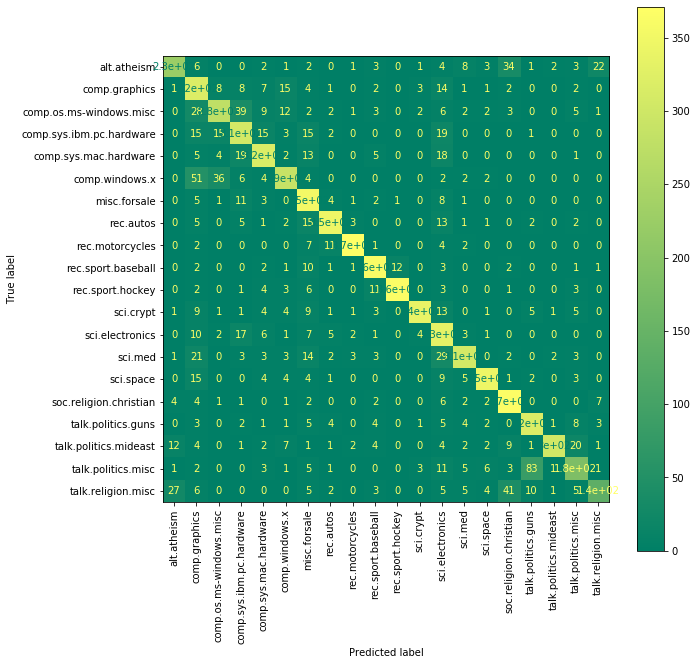

In [47]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=categories)
fig,ax=plt.subplots(figsize=(10,10))
disp=disp.plot(xticks_rotation='vertical',ax=ax,cmap='summer')
plt.show()

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)


In [49]:
knn.fit(X_train,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
y_pred_knn=knn.predict(X_test)

In [51]:
print(accuracy_score(Ytest,y_pred_knn))

0.6578597981943707


In [52]:
cm2=confusion_matrix(Ytest,y_pred_knn)
cm2.shape

(20, 20)

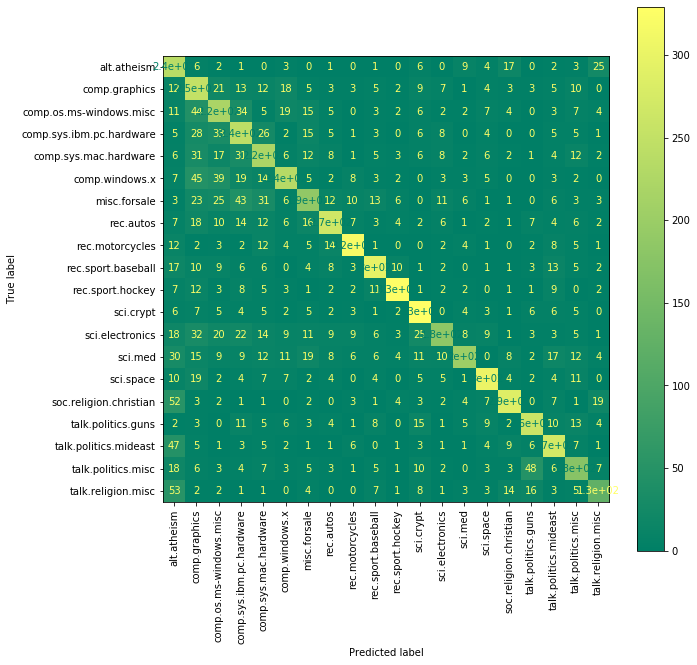

In [53]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=categories)
fig,ax=plt.subplots(figsize=(10,10))
disp=disp.plot(xticks_rotation='vertical',ax=ax,cmap='summer')
plt.show()

# Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
y_train=train.target


In [55]:
nb.fit(X_train_count,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
y_pred_nb=nb.predict(X_test_count)
y_pred_nb

array([ 7, 11,  0, ...,  9,  3, 15])

In [57]:
print(accuracy_score(Ytest,y_pred_nb))

0.7728359001593202


In [58]:
cm3=confusion_matrix(Ytest,y_pred_nb)
cm3.shape

(20, 20)

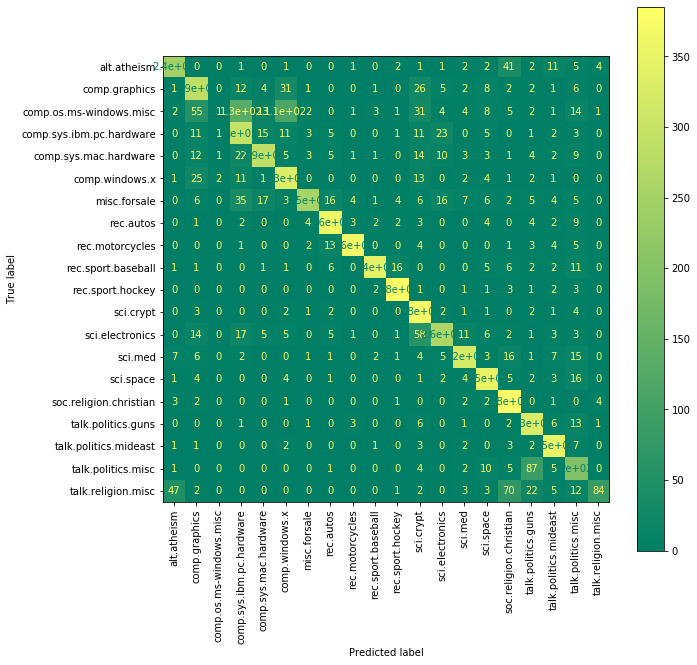

In [59]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=categories)
fig,ax=plt.subplots(figsize=(10,10))
disp=disp.plot(xticks_rotation='vertical',ax=ax,cmap='summer')
plt.show()

# logestic regression

In [60]:
from sklearn.linear_model import nLogisticRegression
lr=LogisticRegression()


In [61]:
lr.fit(X_train,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([ 7,  1,  0, ...,  9, 12, 15])

In [63]:
print(accuracy_score(Ytest,y_pred_lr))

0.8274030801911842


In [64]:
cm4=confusion_matrix(Ytest,y_pred_nb)
cm4.shape

(20, 20)

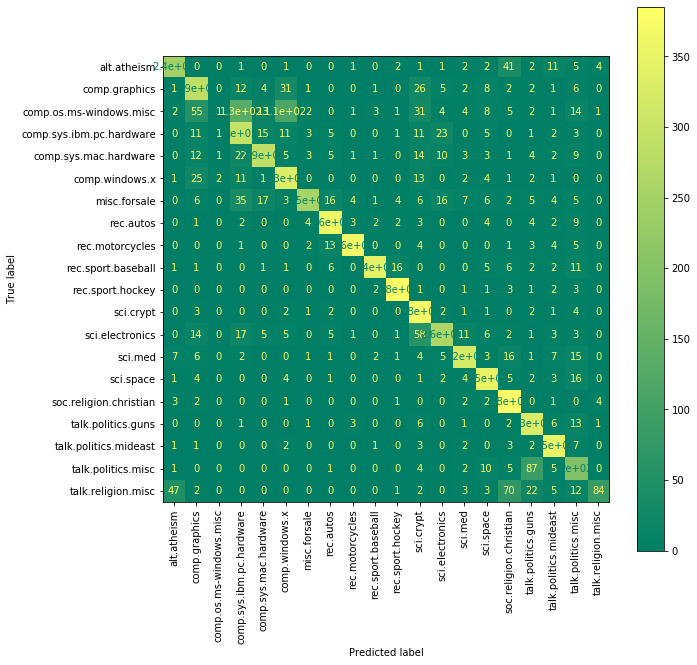

In [91]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=categories)
fig,ax=plt.subplots(figsize=(10,10))
disp=disp.plot(xticks_rotation='vertical',ax=ax,cmap='summer')
plt.show()

# CHECK THE INPUT 

AS WE ARE GETTING THE HIGHEST TEST RESULT IN THE "LOGESTIC REGRESSION " WE CHOOSE THAT ALGO FOR OUR TESTING

In [83]:
test=["atheism was the most read news in the states",
      "hockey player got injured",
     "polliticians, just a big mouth to eat people aive",
      "harley davidson motorbike got the best reviews from the critic"]

In [84]:
f=[]
for i in test:
    s=clean(i)
    f.append(s)

In [85]:
t=tf.transform(f).toarray()

In [86]:
t.shape

(4, 130107)

In [115]:
df2=pd.DataFrame(train.target_names,columns=['names '])
df2


,names
0,alt.atheism
1,comp.graphics
2,comp.os.ms-windows.misc
3,comp.sys.ibm.pc.hardware
4,comp.sys.mac.hardware
5,comp.windows.x
6,misc.forsale
7,rec.autos
8,rec.motorcycles
9,rec.sport.baseball


In [110]:
pred_sample=nb.predict(t)
pred_sample

array([ 0, 10, 13,  8])

In [121]:
for i in pred_sample:
    print (data.target_names[i])

alt.atheism
rec.sport.hockey
sci.med
rec.motorcycles
